In [3]:
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('gutenberg')
from nltk.corpus import gutenberg

import gensim
from gensim.models.word2vec import Word2Vec
from gensim.models.phrases import Phrases, Phraser

from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show, figure

import string
from keras.preprocessing.text import one_hot

[nltk_data] Downloading package punkt to /Users/jason/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/jason/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package gutenberg to /Users/jason/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [5]:
g_sents = gutenberg.sents()

In [10]:
# do some pre-processing
# lc
[word.lower() for word in g_sents[4]]

# remove punctuation
stpwords = stopwords.words('english') + list(string.punctuation)

In [11]:
stpwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
[word.lower() for word in g_sents[4] if word not in stpwords]

['she',
 'youngest',
 'two',
 'daughters',
 'affectionate',
 'indulgent',
 'father',
 'consequence',
 'sister',
 'marriage',
 'mistress',
 'house',
 'early',
 'period']

In [16]:
# do some stemming
stemmer = PorterStemmer()
[stemmer.stem(word.lower()) for word in g_sents[4] if word not in stpwords]

['she',
 'youngest',
 'two',
 'daughter',
 'affection',
 'indulg',
 'father',
 'consequ',
 'sister',
 'marriag',
 'mistress',
 'hous',
 'earli',
 'period']

In [18]:
# bigrams
phrases = Phrases(g_sents)
bigram = Phraser(phrases)

In [20]:
bigram.phrasegrams

{(b'two', b'daughters'): (19, 11.966813731181546),
 (b'her', b'sister'): (195, 17.7960829227865),
 (b"'", b's'): (9781, 31.066242737744524),
 (b'very', b'early'): (24, 11.01214147275924),
 (b'Her', b'mother'): (14, 13.529425062715127),
 (b'long', b'ago'): (38, 63.22343628984788),
 (b'more', b'than'): (541, 29.023584433996874),
 (b'had', b'been'): (1256, 22.306024648925288),
 (b'an', b'excellent'): (54, 39.063874851750626),
 (b'Miss', b'Taylor'): (48, 453.75918026073305),
 (b'very', b'fond'): (28, 24.134280468850747),
 (b'passed', b'away'): (25, 12.35053642325912),
 (b'too', b'much'): (173, 31.376002029426687),
 (b'did', b'not'): (935, 11.728416217142811),
 (b'any', b'means'): (27, 14.096964108090186),
 (b'wedding', b'-'): (15, 17.4695197740113),
 (b'Her', b'father'): (18, 13.129571562488772),
 (b'after', b'dinner'): (21, 21.5285481168817),
 (b'self', b'-'): (124, 47.79018053120332),
 (b'sixteen', b'years'): (12, 107.0461671612265),
 (b'five', b'years'): (42, 40.128755673408115),
 (b'ye

In [21]:
# process whole corpus
lc_sents = []
for s in g_sents:
    lc_sents.append([w.lower() for w in s if w not in list(string.punctuation)])

In [22]:
lc_sents[:6]

[['emma', 'by', 'jane', 'austen', '1816'],
 ['volume', 'i'],
 ['chapter', 'i'],
 ['emma',
  'woodhouse',
  'handsome',
  'clever',
  'and',
  'rich',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her'],
 ['she',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  'indulgent',
  'father',
  'and',
  'had',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  's',
  'marriage',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period'],
 ['her',
  'mother',
  'had',
  'died',
  'too',
  'long',
  'ago',
  'for',
  'her',
  'to',
  'have',
  'more',
  'than',
  'an',
 

In [26]:
lc_bigrams = Phraser(Phrases(lc_sents, min_count=32, threshold=64))

In [27]:
lc_bigrams.phrasegrams

{(b'miss', b'taylor'): (48, 156.44059469941823),
 (b'mr', b'woodhouse'): (132, 82.04651843976633),
 (b'mr', b'weston'): (162, 75.87438262077481),
 (b'mrs', b'weston'): (249, 160.68485093258923),
 (b'great', b'deal'): (182, 93.36368125424357),
 (b'mr', b'knightley'): (277, 161.74131790625913),
 (b'miss', b'woodhouse'): (173, 229.03802722366902),
 (b'years', b'ago'): (56, 74.31594785893046),
 (b'mr', b'elton'): (214, 121.3990121932397),
 (b'dare', b'say'): (115, 89.94000515807346),
 (b'frank', b'churchill'): (151, 1316.4456593286038),
 (b'miss', b'bates'): (113, 276.39588291692513),
 (b'drawing', b'room'): (49, 84.91494947493561),
 (b'mrs', b'goddard'): (58, 143.57843432545658),
 (b'miss', b'smith'): (58, 73.03442128232508),
 (b'few', b'minutes'): (86, 204.16834974753786),
 (b'john', b'knightley'): (58, 83.03755747111268),
 (b'don', b't'): (830, 250.30957446808512),
 (b'good', b'natured'): (66, 88.69936184891343),
 (b'few', b'moments'): (43, 107.77584531675087),
 (b'thousand', b'pounds')

In [29]:
# apply bigrams to sentances
clean = []
for s in lc_sents:
    clean.append(lc_bigrams[s])

In [30]:
clean

[['emma', 'by', 'jane', 'austen', '1816'],
 ['volume', 'i'],
 ['chapter', 'i'],
 ['emma',
  'woodhouse',
  'handsome',
  'clever',
  'and',
  'rich',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her'],
 ['she',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  'indulgent',
  'father',
  'and',
  'had',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  's',
  'marriage',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period'],
 ['her',
  'mother',
  'had',
  'died',
  'too',
  'long',
  'ago',
  'for',
  'her',
  'to',
  'have',
  'more',
  'than',
  'an',
 

In [31]:
# word2vec
model = Word2Vec(
    sentences=clean, 
    size=64, 
    sg=1, 
    window=10, 
    min_count=10, 
    seed=42,
    workers=4
)

In [32]:
len(model.wv.vocab)

10329

In [37]:
model.wv['ma_am']

array([ 0.01468763,  0.01288304,  0.11994062, -0.11401069, -0.07321739,
       -0.3127565 , -0.21021672, -0.04501847, -0.05451438, -0.3802012 ,
        0.11348996, -0.57231617,  0.50612426, -0.09486756,  0.10417476,
       -0.26376688,  0.5415994 , -0.09833561, -0.3100645 , -0.23768874,
        0.5991886 , -0.12161207,  0.3428585 ,  0.35793814,  0.02611183,
       -0.38710806, -0.7373039 , -0.1384911 ,  0.60515326,  0.28352115,
       -0.3419995 ,  0.7443322 ,  0.02658636,  0.00251085,  0.05611367,
        0.5542035 , -0.40048274, -0.46632996, -0.09418095,  0.27998245,
        0.30366743,  0.14567026,  0.15232272,  0.5235767 ,  0.33910352,
        0.31998143,  0.03361582, -0.14417246, -0.38624746, -0.46541938,
       -0.67363715,  0.17334557,  0.4412069 , -0.08375785,  0.26589572,
        0.4900268 ,  0.21793051, -0.29290208,  0.4195858 , -0.18840086,
        0.001437  ,  0.34499368,  0.08568127,  0.25058866], dtype=float32)

In [52]:
model.wv.most_similar(positive=['father', 'woman'], negative=['man'])

/usr/local/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('sister', 0.7881927490234375),
 ('mother', 0.7589460611343384),
 ('husband', 0.7454096078872681),
 ('wife', 0.7263987064361572),
 ('daughter', 0.7258166074752808),
 ('rachel', 0.6691476106643677),
 ('tamar', 0.6610137224197388),
 ('loved', 0.6595306396484375),
 ('sarah', 0.6572914123535156),
 ('rebekah', 0.6551967263221741)]

In [43]:
# visualize
x = model.wv[model.wv.vocab]
tsne = TSNE(n_components=2, n_iter=1000)
x_2d = tsne.fit_transform(x)

In [47]:
df = pd.DataFrame(x_2d, columns=['x', 'y'])
df['tokens'] = model.wv.vocab.keys()

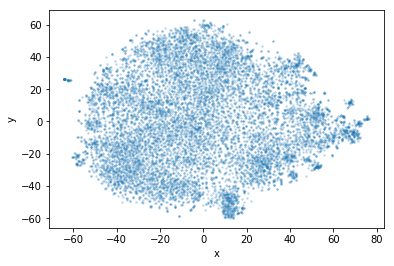

In [49]:
df.plot.scatter('x', 'y', marker='.', alpha=0.2, s=10)

In [50]:
output_notebook()
subset_df = df.sample(n=5000)
p = figure(plot_width=600, plot_height=600)
_ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.tokens)
show(p)

Loading BokehJS ...